In [1]:
%load_ext lab_black
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from admix.data import quantile_normalize
import seaborn as sns

In [2]:
df_assoc = pd.read_excel("out/locus_het/sumstats.xlsx").dropna()
df_assoc = df_assoc[(df_assoc.EUR_af != 0) & (df_assoc.AFR_af != 0)].reset_index(
    drop=True
)
# df_assoc = df_assoc[df_assoc.trait_id != "total_wbc_cnt"]

df_assoc.loc[:, "expected_HET_pval"] = stats.norm.sf(
    quantile_normalize(-df_assoc.HET_pval)
)
df_assoc.loc[:, "bonferroni_significant"] = df_assoc["HET_pval"] < 0.05 / len(df_assoc)

df_assoc["hue"] = ""
df_assoc.loc[df_assoc.bonferroni_significant, "hue"] = df_assoc.loc[
    df_assoc.bonferroni_significant, "trait_id"
]
df_assoc.loc[~df_assoc.bonferroni_significant, "hue"] = "non-sig"

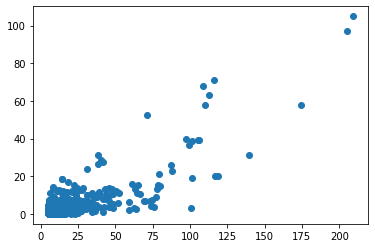

In [3]:
plt.scatter(-np.log10(df_assoc["P-VALUE"]), -np.log10(df_assoc.assoc_pval))

In [4]:
pval = df_assoc.HET_pval
chi2 = stats.norm.ppf(pval / 2) ** 2
print(f"lambda_gc = {np.quantile(chi2, 0.5) / stats.chi2.ppf(0.5, 1):.3g}")

lambda_gc = 1.89


Text(0, 0.5, 'HET $-\\log_{10}(p)$')

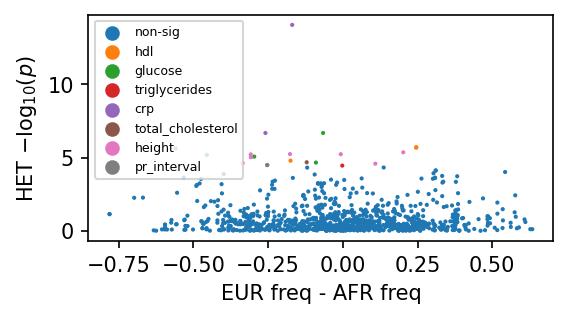

In [5]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
# ax.scatter(df_assoc.EUR_af - df_assoc.AFR_af, -np.log10(df_assoc.HET_pval), s=4)
sns.scatterplot(
    x=df_assoc.EUR_af - df_assoc.AFR_af,
    y=-np.log10(df_assoc.HET_pval),
    hue=df_assoc.hue,
    s=4,
    linewidth=0,
    palette="tab10",
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="best", fontsize=6)

ax.set_xlabel("EUR freq - AFR freq")
ax.set_ylabel("HET $-\log_{10}(p)$")

Text(0, 0.5, 'HET $-\\log_{10}(p)$')

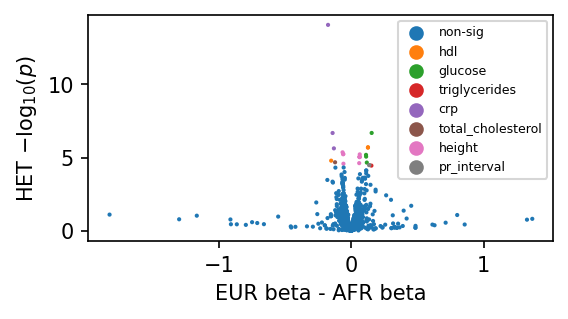

In [6]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
# ax.scatter(df_assoc.EUR_af - df_assoc.AFR_af, -np.log10(df_assoc.HET_pval), s=4)
sns.scatterplot(
    x=df_assoc.EUR_beta - df_assoc.AFR_beta,
    y=-np.log10(df_assoc.HET_pval),
    hue=df_assoc.hue,
    s=4,
    linewidth=0,
    palette="tab10",
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc="best", fontsize=6)

ax.set_xlabel("EUR beta - AFR beta")
ax.set_ylabel("HET $-\log_{10}(p)$")

Text(0, 0.5, 'HET $-\\log_{10}(p)$')

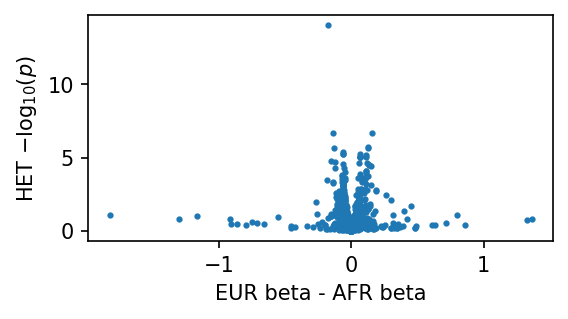

In [7]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
ax.scatter(df_assoc.EUR_beta - df_assoc.AFR_beta, -np.log10(df_assoc.HET_pval), s=4)
ax.set_xlabel("EUR beta - AFR beta")
ax.set_ylabel("HET $-\log_{10}(p)$")

In [8]:
def qqplot(pval, ax=None):
    if ax is None:
        ax = plt.gca()
    expected_pval = stats.norm.sf(quantile_normalize(-pval))
    ax.scatter(-np.log10(expected_pval), -np.log10(pval), s=2)
    lim = max(-np.log10(expected_pval))
    ax.plot([0, lim], [0, lim], "r--")
    ax.set_xlabel("Expected -$\log_{10}(p)$")
    ax.set_ylabel("Observed -$\log_{10}(p)$")

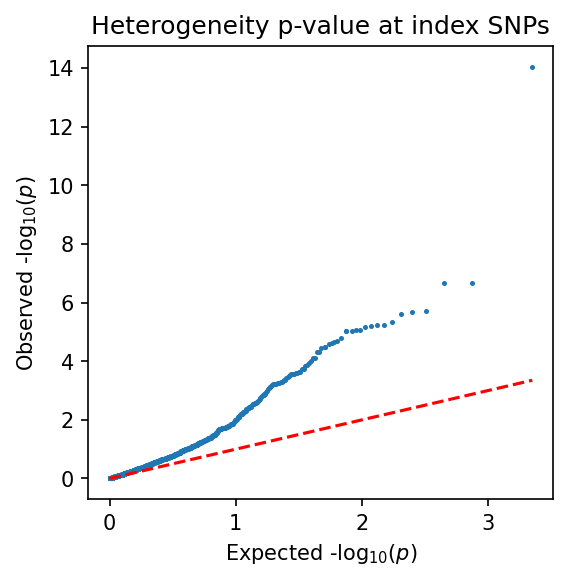

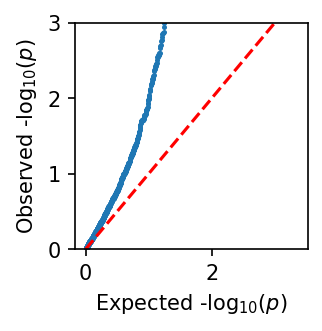

In [9]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
qqplot(df_assoc.HET_pval, ax=ax)
ax.set_title("Heterogeneity p-value at index SNPs")
plt.show()

fig, ax = plt.subplots(figsize=(2, 2), dpi=150)
qqplot(df_assoc.HET_pval, ax=ax)
ax.set_ylim(0, 3)

plt.show()

In [10]:
# color points by trait after Bonferroni correction

In [11]:
df_plot = df_assoc[["trait_id", "SNPS", "HET_pval", "assoc_pval"]].copy()
df_plot.loc[:, "expected_HET_pval"] = stats.norm.sf(
    quantile_normalize(-df_plot.HET_pval)
)
df_plot.loc[:, "bonferroni_significant"] = df_plot["HET_pval"] < 0.05 / len(df_plot)

df_plot["hue"] = ""
df_plot.loc[df_plot.bonferroni_significant, "hue"] = df_plot.loc[
    df_plot.bonferroni_significant, "trait_id"
]
df_plot.loc[~df_plot.bonferroni_significant, "hue"] = "non-sig"

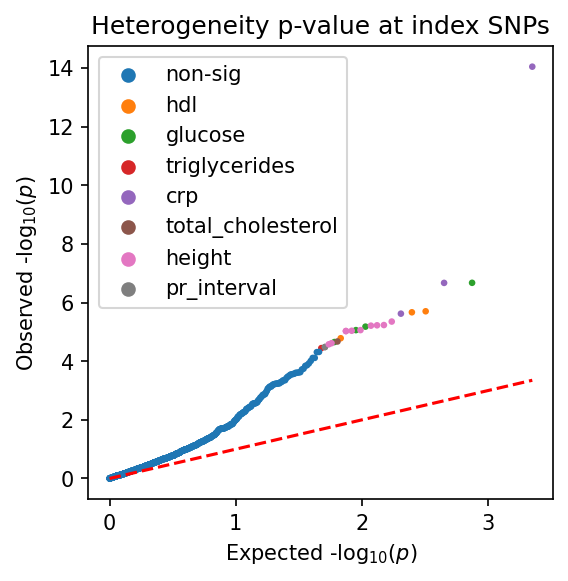

In [12]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sns.scatterplot(
    x=-np.log10(df_plot.expected_HET_pval),
    y=-np.log10(df_plot.HET_pval),
    hue=df_plot.hue,
    s=10,
    linewidth=0,
    palette="tab10",
    ax=ax,
)
lim = max(-np.log10(df_plot.expected_HET_pval))
ax.plot([0, lim], [0, lim], "r--")
ax.set_xlabel("Expected -$\log_{10}(p)$")
ax.set_ylabel("Observed -$\log_{10}(p)$")
handles, labels = ax.get_legend_handles_labels()
ax.set_title("Heterogeneity p-value at index SNPs")

ax.legend(handles=handles, labels=labels, loc="best")